In [123]:
from sklearn.datasets import make_classification
import numpy as np

X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False, class_sep=10)

In [124]:
import matplotlib.pyplot as plt
%matplotlib inline

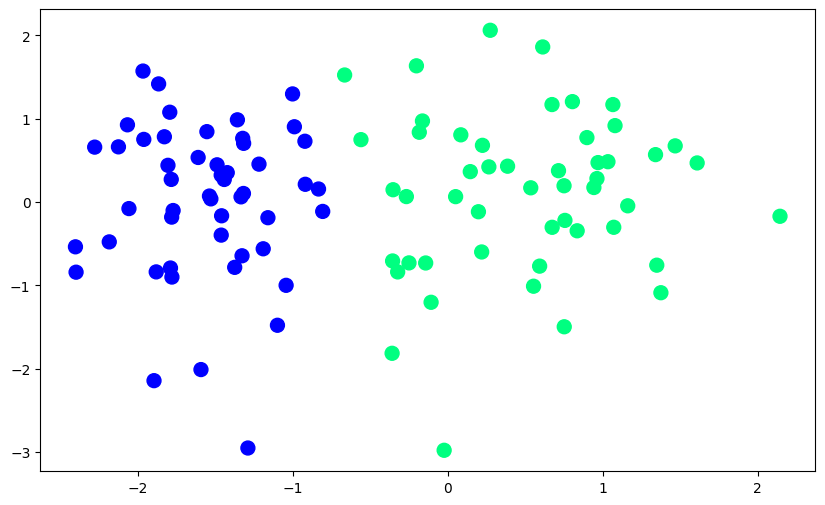

In [125]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1],c=y,cmap='winter',s=100)

In [126]:
def step(x):
    return 1 if x>=0 else 0


def perceptron(X, y):
    updates = {"w0":[], "w1":[],"w2":[]}
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr=0.1
    
    for i in range(1000):
        updates["w0"].append(weights[0])
        updates["w1"].append(weights[1])
        updates["w2"].append(weights[2])
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j] - y_hat)*X[j]
        
    return weights[0],weights[1:],updates

In [127]:
intercept_,coef_,param_updates = perceptron(X,y)

In [128]:
intercept_,coef_

(np.float64(1.0), array([1.2949593 , 0.21156177]))

In [129]:
xaxis = len(param_updates["w0"])
xaxis

1000

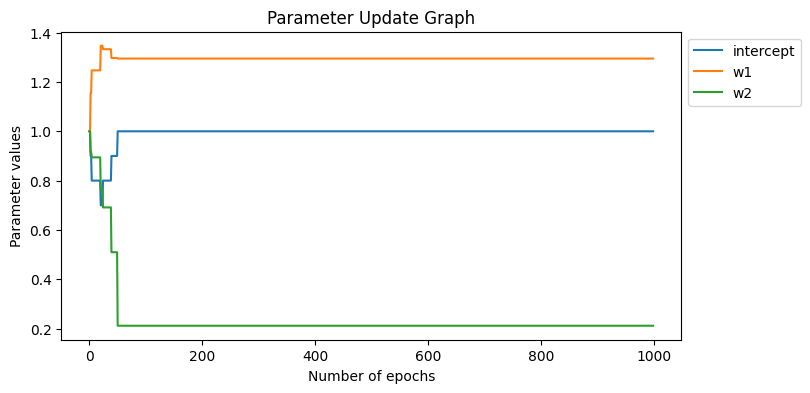

In [130]:
xaxis = [i for i in range(1000)]

plt.figure(figsize=(8,4))
plt.plot(xaxis, param_updates["w0"], label="intercept")
plt.plot(xaxis, param_updates["w1"], label="w1")
plt.plot(xaxis, param_updates["w2"], label="w2")
plt.xlabel("Number of epochs")
plt.ylabel("Parameter values")
plt.title("Parameter Update Graph")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [131]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])
m,b

(np.float64(-6.1209512920158735), np.float64(-4.72675187050453))

In [132]:
x_input = np.linspace(-3, 3, 100)
y_input = m*x_input + b

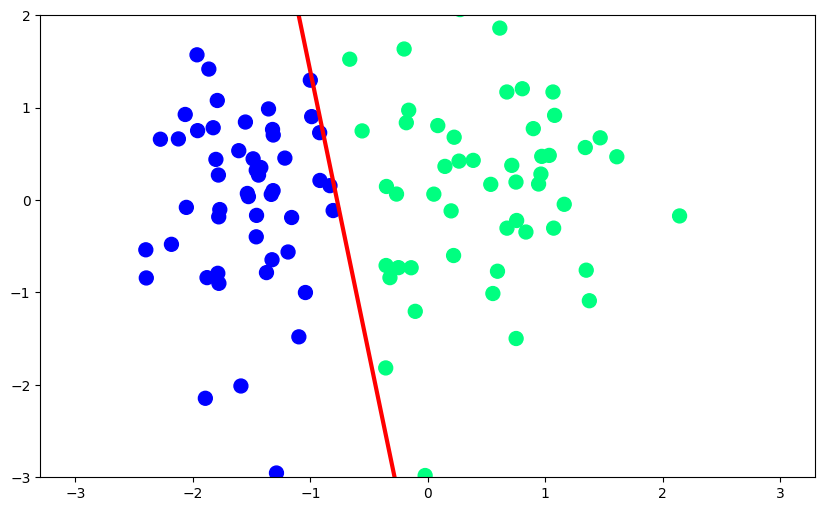

In [133]:
plt.figure(figsize=(10,6))
plt.plot(x_input, y_input, color='red', linewidth = 3)
plt.scatter(X[:,0], X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

plt.show()